In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
mpl.rc('font',family='Malgun Gothic')

In [2]:
df_member = pd.read_csv('1_store_member.csv')
df_product = pd.read_csv('2_store_product.csv')

In [3]:
df_member.head()

,회원번호,회원상태,성별,결혼유무,주소,생년,연령
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70


In [4]:
df_product.head()

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0
1,20170201,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0
2,20170201,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0
3,20170201,80301010,간식,밀가공,라면,사리면(100g),1.0,900,매장3,NaN,2101.0
4,20170201,80305003,간식,밀가공,만두,고기만두(500g),1.0,5400,매장3,NaN,2101.0


In [5]:
# 구매 데이터에서 회원 번호 별 총 구매금액 / 총구매수량 계산
p1 = df_product.pivot_table(index='회원번호', values=['구매금액','구매수량'],
                            aggfunc='sum').reset_index()

In [6]:
df_member2 = pd.merge(df_member,p1,on='회원번호', how='inner')

In [7]:
# 구매 데이터에서 회원 번호 별 방문횟수의 총합
df_product['방문횟수'] = 1

In [8]:
p2 = df_product.pivot_table(index=['회원번호','공급일자'],
                      values='방문횟수',aggfunc='min').reset_index()
p3 = p2.pivot_table(index='회원번호',
               values='방문횟수',aggfunc='sum').reset_index()

In [9]:
df_member3 = pd.merge(df_member2, p3 ,on='회원번호',how='inner')

In [10]:
df_member3['1회방문구매평균'] = df_member3['구매금액'] / df_member3['방문횟수']
df_member3['1회방문구매평균'].describe()

count      4285.000000
mean      32913.468270
std       25756.734483
min           0.000000
25%       15890.476190
50%       27166.666667
75%       43080.140845
max      329260.000000
Name: 1회방문구매평균, dtype: float64

In [11]:
# 1회방문구매평균을 바탕으로 고객등급을 계산 (연속형->범주형, 층별화)
def func1(row):
    if row >= 100000:
        return 'A'
    elif row >= 50000:
        return 'B'
    elif row >= 20000:
        return 'C'
    else:
        return 'D'

df_member3['고객등급'] = df_member3 ['1회방문구매평균'].apply(func1)

In [12]:
df_member3['고객등급'].value_counts()

C    2006
D    1506
B     676
A      97
Name: 고객등급, dtype: int64

# Mission 4. (점심)

    * 판매 주력상품에 대한 분석을 하고자한다 (df_product)
1) df_product데이터의 구조와 타입을 확인하고 결측값도 확인
2) df_product데이터의 '구매금액'과 '구매수량'의 기술통계량을 확인 
3) df_product에서 '물품대분류'중 가장 많이 판매되는 3가지 항목을 확인
   (품목 별 구매수량의 합이 높은 3개 확인) 
4) 앞서 확인한 3가지 항목을 추출하여 df1_product_top변수로 선언하고,
    df1_product_top에서 구매매장 별 구매금액의 합과 평균을 계산 
5) 공급일자 데이터를 날짜형식으로 변환한 다음 연도/월/요일 을 새로운 파생변수로 선언하시오
    ( pd.to_datetime(   , format =%Y%m%d) )
6) '월'에 따른 '물품대분류'별 '구매금액'의 합을 계산하여 result_p1.xlsx로 저장 
7) '요일'데이터에서 토요일과 일요일의 구매금액의 평균의 차이가 있는지 가설검정을 수행

    * 고객데이터를 분석하고자 한다 (df_member) 
8) df_member 데이터의 구조와 타입을 확인하고 결측값을 확인
9) '생년'데이터를 이용해 2023년 기준 나이를 재계산하여 '연령_new'로 선언 
10) '연령_new'를 이용해 '연령대'새로운 파생변수를 계산 (10대 /20대 /30대...)

    * df_member3 데이터를 이용해 매출과 고객 특성에 대한 분석을 하고자 한다 
11) '결혼유무'에서 '기혼'에 해당하는 고객들 중,
    '방문횟수'가 높은 상위 30명의 고객 명단을 추출하여 'result_member.xlsx'로 저장 
12) '구매금액'의 합이 가장 높은 2개 연령대를 확인하여,
    두 연령대 간 '방문횟수'의 평균의 차이가 있는지 가설검정을 수행 
13) '성별'별 '구매금액'에 대한 평균을 시각화 하시오.

In [13]:
# 1) df_product데이터의 구조와 타입을 확인하고 결측값도 확인
df1 = pd.read_csv('2_store_product.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735783 entries, 0 to 735782
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      735783 non-null  int64  
 1   물품코드      735783 non-null  int64  
 2   물품대분류     735783 non-null  object 
 3   물품중분류     735783 non-null  object 
 4   물품소분류     735783 non-null  object 
 5   물품명       735783 non-null  object 
 6   구매수량      735783 non-null  float64
 7   구매금액      735783 non-null  int64  
 8   구매매장      735783 non-null  object 
 9   반품_원거래일자  10337 non-null   float64
 10  회원번호      735761 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 61.7+ MB


In [14]:
df_product.isnull().sum()
# isnull() : 해당 데이터가 결측값인지 아닌지를 True / False 출력
# sum() : 총합을 계산 / 각 항목별 총합이 계산

공급일자             0
물품코드             0
물품대분류            0
물품중분류            0
물품소분류            0
물품명              0
구매수량             0
구매금액             0
구매매장             0
반품_원거래일자    725446
회원번호            22
방문횟수             0
dtype: int64

In [15]:
# 2) df_product데이터의 '구매금액'과 '구매수량'의 기술통계량을 확인 

df_product[['구매금액','구매수량']].describe()

,구매금액,구매수량
count,7.357830e+05,735783.000000
mean,5.677010e+03,1.153989
std,8.650792e+03,0.762145
min,-3.600000e+05,-120.000000
25%,2.150000e+03,1.000000
50%,3.800000e+03,1.000000
75%,6.500000e+03,1.000000
max,1.449000e+06,120.000000


In [16]:
# 3) df_product에서 '물품대분류'중 가장 많이 판매되는 3가지 항목을 확인
#   (품목별 구매수량의 합이 높은 3개 확인) 

df_product.pivot_table(index='물품대분류',
                       values='구매수량',
                       aggfunc='sum').sort_values(by='구매수량',ascending=False).head(3)


,구매수량
물품대분류,
채소,210661.70
축산물,155188.75
간식,137427.30


In [17]:
# 4) 앞서 확인한 3가지 항목을 추출하여 df1_product_top변수로 선언하고,
#    df1_product_top에서 구매매장 별 구매금액의 합과 평균을 계산 

cond1 = df_product['물품대분류'].isin(['간식','축산물','채소'])
df1_product_top = df_product.loc[cond1]
df1_product_top.pivot_table(index='구매매장',values='구매금액',
                           aggfunc=['mean','sum'])


,mean,sum
,구매금액,구매금액
구매매장,,
매장1,4770.638426,363985400
매장2,4908.271082,461745602
매장3,4949.910326,916748142
매장4,5019.146844,419048570


In [18]:
# 5) 공급일자 데이터를 날짜형식으로 변환한 다음 연도/월/요일 을 새로운 파생변수로 선언하시오
#    ( pd.to_datetime(   , format =%Y%m%d) )
df_product['공급일자dt']= pd.to_datetime( df_product['공급일자'], format ='%Y%m%d')

In [19]:
df_product['연도']= df_product['공급일자dt'].dt.year
df_product['월']= df_product['공급일자dt'].dt.month
df_product['요일']= df_product['공급일자dt'].dt.day_name()


In [20]:
# 6) '월'에 따른 '물품대분류'별 '구매금액'의 합을 계산하여 result_p1.xlsx로 저장

df_product.pivot_table(index='물품대분류',columns='월',values='구매금액',
                       aggfunc='sum').to_excel('result_p1.xlsx')

In [21]:
# 7) '요일'데이터에서 토요일과 일요일의 구매금액의 평균의 차이가 있는지 가설검정을 수행

cond1 = df_product['요일'].isin(['Sunday','Saturday'])

# 7-1) 토요일과 일요일 데이터의 구매금액의 정규분포 검정
stats.normaltest(df_product.loc[cond1]['구매금액'])
# 해당 데이터의 분포는 정규성을 따르지 않는다.

# 7-2) 정규성을 따르지 않는 상황에서 토요일과 일요일의 구매금액의 평균의 차이
# 귀무가설 :  두 집단의 구매금액의 평균의 차이가 없다.
# 대립가설 :  두 집단의 구매금액의 평균의 차이가 있다.
cond1 = df_product['요일']=='Sunday'
cond2 = df_product['요일']=='Saturday'
df_product_sun = df_product.loc[cond1]
df_product_sat = df_product.loc[cond2]
stats.ranksums(df_product_sun['구매금액'], df_product_sat['구매금액'])
# P.value < 0.05 (5%) / 대립가설 참 / 두 집단의 구매금액의 평균의 차이가 있다.

RanksumsResult(statistic=3.0474877976155326, pvalue=0.002307628950574978)

In [22]:
# 8) df_member 데이터의 구조와 타입을 확인하고 결측값을 확인
df_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회원번호    4396 non-null   int64 
 1   회원상태    4396 non-null   object
 2   성별      4396 non-null   object
 3   결혼유무    3449 non-null   object
 4   주소      4396 non-null   object
 5   생년      4396 non-null   int64 
 6   연령      4396 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 240.5+ KB


In [23]:
# 9) '생년'데이터를 이용해 2023년 기준 나이를 재계산하여 '연령_new'로 선언 

df_member['연령_new'] = 2023 - df_member3['생년'] +1
df_member

,회원번호,회원상태,성별,결혼유무,주소,생년,연령,연령_new
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,57.0
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,77.0
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,52.0
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49,55.0
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70,76.0
...,...,...,...,...,...,...,...,...
4391,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963,55,NaN
4392,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982,36,NaN
4393,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975,43,NaN
4394,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961,57,NaN


In [24]:
# 10) '연령_new'를 이용해 '연령대'새로운 파생변수를 계산 (10대 /20대 /30대...)
df_member3['연령'] = 2023 - df_member3['생년']+1
cond1 = (df_member3['연령']<30)
df_member3.loc[cond1]

,회원번호,회원상태,성별,결혼유무,주소,생년,연령,구매금액,구매수량,방문횟수,1회방문구매평균,고객등급
3670,5882,정상회원,남,미혼,경기 용인시 수지구 풍덕천2,1995,29,7100,1.0,1,7100.0,D
4108,6320,탈퇴,남,기혼,경기 성남시 수정구 복정동,1995,29,0,0.0,1,0.0,D


In [25]:
def func1(row):
    return str(row)[0] +'0대'

df_member['연령대'] = df_member['연령_new'].apply(func1)
df_member['연령대'].value_counts()

40대    1256
50대    1200
60대     839
70대     525
80대     227
30대     199
n0대     111
90대      34
10대       3
20대       2
Name: 연령대, dtype: int64

In [26]:
def func1(row):
    return str(row)[0] +'0대'

df_member['연령대'] = df_member['연령_new'].apply(func1)
# replace() : 기존의 값을 새로운 값으로 변경
df_member['연령대'].replace('10대','90대이상').replace('90대','90대이상')
df_member['연령대'].replace({'10대':'90대이상','90대':'90대이상'})

0       50대
1       70대
2       50대
3       50대
4       70대
       ... 
4391    n0대
4392    n0대
4393    n0대
4394    n0대
4395    n0대
Name: 연령대, Length: 4396, dtype: object

 * df_member3 데이터를 이용해 매출과 고객 특성에 대한 분석을 하고자 한다 

11) '결혼유무'에서 '기혼'에 해당하는 고객들 중,
    '방문횟수'가 높은 상위 30명의 고객 명단을 추출하여 'result_member.xlsx'로 저장 

In [27]:
#df_member3['결혼유무'] == '기혼'
#df1.loc[a].sort_values(by='기혼').head(30).to_excel('result_member.xlsx')

cond1 = (df_member3['결혼유무']=='기혼')
df_member3.loc[cond1].sort_values(by='방문횟수', 
                    ascending=False).head(30).to_excel('result_member.xlsx')

12) '구매금액'의 합이 가장 높은 2개 연령대를 확인하여,
두 연령대 간 '방문횟수'의 평균의 차이가 있는지 가설검정을 수행


In [28]:
df_member3['연령_new'] = 2023 - df_member3['생년'] +1

In [29]:
df_member3['연령대'] = df_member3['연령_new'].apply(func1)
df_member3.pivot_table(index='연령대',values='구매금액',aggfunc='sum')

,구매금액
연령대,
10대,5490030
20대,7100
30대,74853085
40대,1154840902
50대,1592537145
60대,714931621
70대,467509445
80대,149850385
90대,16864275


In [30]:
cond1 = df_member3['연령대'].isin(['40대','50대'])
# 12-1) 40,50대 고객명단의 방문횟수 데이터가 정규성을 따르는가? 
stats.normaltest(df_member3.loc[cond1]['방문횟수'])
# P.value < 0.05 / 대립가설 참 / 정규분포를 띄지 않는다

NormaltestResult(statistic=1041.5350436189851, pvalue=6.816146618022918e-227)

In [31]:
# 12-2 ) 
# 귀무가설 : 40대와 50대의 방문횟수의 평균의 차이가 없다. 
# 대립가설 : 40대와 50대의 방문횟수의 평균의 차이가 있다.
cond1 = (df_member3['연령대']=='40대')
cond2 = (df_member3['연령대']=='50대')
df_member3_40 = df_member3.loc[cond1]
df_member3_50 = df_member3.loc[cond2]
stats.ranksums(df_member3_40['방문횟수'], df_member3_50['방문횟수'])
# P.value > 0.05 / 귀무가설 참 / 40대와 50대의 방문횟수의 평균의 차이가 없다.

RanksumsResult(statistic=-1.5356357164914587, pvalue=0.12462774925460733)

<AxesSubplot:xlabel='성별', ylabel='구매금액'>

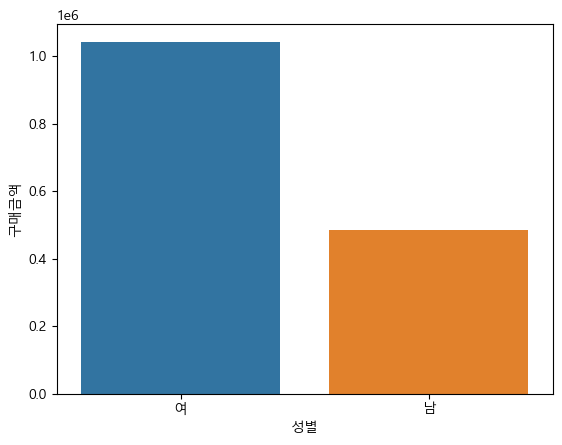

In [32]:
# 13) '성별' 별 '구매금액'에 대한 평균을 시각화 하시오. 
sns.barplot(data=df_member3, x='성별', y='구매금액',ci=None)


In [33]:
# 데이터 재구조화
df1 = pd.read_excel('04_Data.xlsx', skiprows=1)
df1.shape

(40, 25)

In [34]:
df1.columns

Index([                   '구분',                 '카테고리명',
                        '자재그룹',                 '자재그룹명',
                         '제품명',                    '단위',
                          '판매',     2019-12-01 00:00:00,
           2020-10-01 00:00:00,     2020-11-01 00:00:00,
           2020-12-01 00:00:00, '2019-12-01 00:00:00.1',
       '2020-10-01 00:00:00.1', '2020-11-01 00:00:00.1',
       '2020-12-01 00:00:00.1', '2019-12-01 00:00:00.2',
       '2020-10-01 00:00:00.2', '2020-11-01 00:00:00.2',
       '2020-12-01 00:00:00.2', '2019-12-01 00:00:00.3',
       '2020-10-01 00:00:00.3', '2020-11-01 00:00:00.3',
       '2020-12-01 00:00:00.3',                  '안전재고',
                         ' 분류'],
      dtype='object')

In [35]:
# 재구조화 Reshape
df2 = df1.melt(id_vars=['구분','카테고리명','자재그룹','자재그룹명',
                  '제품명','단위','판매','안전재고',' 분류'])
# 항목명을 변경
df3 = df2.rename(columns={'variable':'날짜', 'value':'판매금액',' 분류':'분류'})

C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_11800\201868727.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df2 = df1.melt(id_vars=['구분','카테고리명','자재그룹','자재그룹명',


In [36]:
df3.isnull().sum()

구분       0
카테고리명    0
자재그룹     0
자재그룹명    0
제품명      0
단위       0
판매       0
안전재고     0
분류       0
날짜       0
판매금액     0
dtype: int64

In [37]:
df3.shape

(640, 11)

In [38]:
df3['공급연도'] = df3['날짜'].dt.year
df3['공급연도'].value_counts()

2020    480
2019    160
Name: 공급연도, dtype: int64

In [39]:
# 분류별 19년도 대비 20년도의 판매금액을 증감 확인
p1 = df3.pivot_table(index='분류',columns='공급연도',
                values='판매금액',aggfunc='sum').reset_index()
p1['증감율'] = (p1[2020]-p1[2019])/p1[2019]
p1

공급연도,분류,2019,2020,증감율
0,A,356379.4,1448912.0,3.065645
1,B,20564.1,120.0,-0.994165
2,E,27600.5,25506.2,-0.075879
3,F,19498.5,113960.6,4.844583
4,G,1039.0,25810.2,23.841386
5,H,0.0,52900.4,inf
6,K,88588.6,105500.9,0.190908
7,L,0.0,107632.8,inf
8,M,143063.8,296561.9,1.072935


# Mission 5.

- df3 데이터를 이용해 아래와 같은 분석을 실시하고자 한다.
1) df3 데이터 연속형 자료의 기술 통계량을 확인
2) '판매금액'이 상위 75% 이상인 데이터를 A / 이하인 데이터를 B로 '판매구분'이라는 새로운 파생변수를 생성
3) df3 '날짜'데이터를 이용해 월 / 요일 데이터 추출
4) '분류'에서 A에 해당하는 제품을 뽑아 '판매금액'의 평균과 중앙값의 차이를 계산
5) '분류'에 따른 '판매금액'이 가장 높은 '제품명' 2가지 제품의 '판매금액'의 평균의 차이가 있는지 가설검정을 수행
6) df3 데이터에서 '판매금액'이 가장 높은 '제품명' 2가지 제품의 '판매금액'의 평균의 차이가 있는지 가설검정을 수행

- 블로그 03_Data.csv 파일을 다운로드 받아 df4로 선언하여 아래의 과제를 수행
7) df4 데이터의 데이터의 구조와 타입을 확인
8) df4 데이터의 범주형 데이터의 요약통계량을 계산
9) df4 데이터의 '프로그램'항목의 종류와 빈도수를 확인
10) df4 데이터의 '채널'별 '최종결제금액'의 합을 계산
11) df4 데이터의 '결제시각'데이터를 이용해 '결제일자'와 '결제시간'(날짜와 시간을 분리 (apply 함수 활용)
12) 'facebook'으로 유입된 고객들과 'naver'로 유입된 고객들의 '최종결제금액'평균의 차이가 있는자ㅣ 시각화 하고 가설검정을 수행
13) 'facebook'으로 유입된 고객들 중 '최종결제금액'이 가장 높은 상위 10명의 명단을 뽑아 result1_facebook.xlsx로 저장

1) df3 데이터를 이용해 아래와 같은 분석을 실시하고자 한다.
   df3 데이터 연속형 자료의 기술 통계량을 확인


In [40]:
df3.describe()

,자재그룹,판매,안전재고,판매금액,공급연도
count,640.0,640.000000,640.000000,640.000000,640.000000
mean,1687.0,14025.460000,2162.180000,4427.560781,2019.750000
std,0.0,40176.636238,9467.402429,11714.434732,0.433351
min,1687.0,0.000000,0.000000,0.000000,2019.000000
25%,1687.0,0.000000,0.000000,0.000000,2019.750000
50%,1687.0,438.150000,0.000000,0.000000,2020.000000
75%,1687.0,9258.275000,0.000000,492.425000,2020.000000
max,1687.0,234603.900000,46893.900000,84967.200000,2020.000000


2) '판매금액'이 상위 75% 이상인 데이터를 A
    이하인 데이터를 B로 '판매구분'이라는 새로운 파생변수를 생성


In [41]:
cond1 = df3['판매금액']>=df3['판매금액'].quantile(0.75)
df3.loc[cond1,'판매구분']='A'
df3.loc[~cond1,'판매구분']='B'

In [42]:
df3['판매구분'].value_counts()

B    480
A    160
Name: 판매구분, dtype: int64

3) df3 '날짜'데이터를 이용해 월 / 요일 데이터 추출

In [43]:
df3['날짜_dt']=pd.to_datetime(df3['날짜'])
df3['월']=df3['날짜_dt'].dt.month
df3['요일']=df3['날짜_dt'].dt.day_name()

4) '분류'에서 A에 해당하는 제품을 뽑아 '판매금액'의 평균과 중앙값의 차이를 계산

In [44]:
cond1 = (df3['분류']=='A')
df3_a = df3.loc[cond1]
df3_a['판매금액'].mean() - df3_a['판매금액'].median()

10151.6875

5) '분류'에 따른 '판매금액'이 가장 높은 '제품명' 2가지 제품의 '판매금액'의 평균의 차이가 있는지 가설검정을 수행
# * '범주'별,'연속'의 통계량 계산 (~에 따른)

In [1]:
df1['메세지'].value_counts()

NameError: name 'df1' is not defined

6) df3 데이터에서 '판매금액'의 합이 가장 높은 '제품명' 2가지 제품의
  '판매금액'의 평균의 차이가 있는지 가설검정을 수행

In [46]:
df3.pivot_table(index='제품명',values='판매금액',
                aggfunc='sum').sort_values(by='판매금액',ascending=False)

,판매금액
제품명,
E,589560.1
H,297757.6
FF3,279876.8
A2,238295.4
J,194242.5
K,187450.4
G,159748.9
I,110513.8
KC2,107632.8


6-1) E 제품과 H 제품의 '판매금액'의 분포가 정규분포를 따르는가?
    귀무가설 : 해당 데이터의 분포는 정규분포를 따른다.
    대립가설 : 해당 데이터의 분포는 정규분포를 따르지 않는다.

In [47]:
cond1 = (df3['제품명']=='E')
cond2 = (df3['제품명']=='H')
stats.normaltest(df3.loc[cond1|cond2]['판매금액'])
# P.value<0.05 | 대립가설 참 | 해당 분포는 정규분포를 따르지 않는다.

NormaltestResult(statistic=9.306514822431357, pvalue=0.00953050653391736)

6-2) 정규성을 따르지 않는 판매금액에 대해, 두집단 간 평균의 차이가 있는가?
    귀무가설 : E와 H집단의 판매금액의 평균이 같다.
    대립가설 : E와 H집단의 판매금액의 평균이 다르다.

In [48]:
df3_E = df3.loc[cond1]
df3_H = df3.loc[cond2]
stats.ranksums(df3_E['판매금액'],df3_E['판매금액'])
# P.value<0.05 | 귀무가설 참 | E와 H집단의 판매금액의 평균이 같다.

RanksumsResult(statistic=0.0, pvalue=1.0)

In [49]:
df3.pivot_table(index='제품명',values='판매금액',aggfunc='median')

,판매금액
제품명,
A,0.00
A1,0.00
A2,9147.15
A3,13.35
B,0.00
B2,60.20
B3,3733.95
C,1687.30
D,1340.00


7) df4 데이터의 데이터의 구조와 타입을 확인

In [50]:
df4 = pd.read_csv('03_data.csv')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   회원코드        10000 non-null  object
 1   프로그램        10000 non-null  object
 2   상태          10000 non-null  object
 3   프로그램가격      10000 non-null  int64 
 4   최종결제금액      10000 non-null  int64 
 5   결제시각        10000 non-null  object
 6   결제유형        10000 non-null  object
 7   채널          10000 non-null  object
 8   보조식품가격      10000 non-null  int64 
 9   보조식품(추가구매)  10000 non-null  object
dtypes: int64(3), object(7)
memory usage: 781.4+ KB


8) df4 데이터의 범주형 데이터의 요약통계량을 계산


In [51]:
df4.describe(include='object')

,회원코드,프로그램,상태,결제시각,결제유형,채널,보조식품(추가구매)
count,10000,10000,10000,10000,10000,10000,10000
unique,10000,2,3,9995,1,7,6
top,Y9RY2VSI,체중감량 프로그램 (타입 A),completed,2017-05-13 오후 10:18:29.768000,Recurring,facebook,구매안함
freq,1,6672,5400,2,10000,6880,7520


9) df4 데이터의 '프로그램'항목의 종류와 빈도수를 확인

In [52]:
df4['프로그램'].value_counts()

체중감량 프로그램 (타입 A)    6672
체중감량 프로그램 (타입B)     3328
Name: 프로그램, dtype: int64

10) df4 데이터의 '채널'별 '최종결제금액'의 합을 계산

In [53]:
df4.pivot_table(index='채널',values='최종결제금액',aggfunc='sum')

,최종결제금액
채널,
direct,31337160
email,30655080
facebook,825136460
google,12663480
instagram,3562620
naver,111491750
others,149349690


11) df4 데이터의 '결제시각'데이터를 이용해 '결제일자'와 '결제시간'
    (날짜와 시간을 분리 (apply 함수 활용)

In [54]:
def func1(row):
    return row[0:10]

def func2(row):
    return row.split(' ')[2]

df4['결제일자'] = pd.to_datetime(df4['결제시각'].apply(func1))
df4['결제시간'] = df4['결제시각'].apply(func2)

In [55]:
# 12) 'facebook'으로 유입된 고객들과 'naver'로 유입된 고객들의
# '최종결제금액'평균의 차이가 있는지 시각화 하고 가설검정을 수행

cond1 = df_product['최종결제금액']=='naver'
cond2 = df_product['최종결제금액']=='facebook'
df_product_sun = df_product.loc[cond1]
df_product_sat = df_product.loc[cond2]
stats.ranksums(df_product_sun['구매금액'], df_product_sat['구매금액'])

KeyError: '최종결제금액'

In [ ]:
cond1 = (df4['채널'].isin(['facebook','naver']))
df4_ch1 = df4.loc[cond1]

In [ ]:
sns.barplot(data=df4_ch1, x='채널', y='최종결제금액', ci=None)

In [ ]:
# 12-1) 두 집단 데이터의 '최종결제금액'이 정규분포를 따르는가?
# 귀무가설 : 해당 분포는 정규분포를 따른다. 
# 대립가설 : 해당 분포는 정규분포를 따르지 않는다. 
stats.normaltest(df4_ch1['최종결제금액'])
# P.value < 0.05 / 대립가설 참 / '최종결제금액'은 정규분포를 따르지 않음


In [ ]:
# 12-2 ) 두 집단의 '최종결제금액'의 평균의 차이가 있는가?
# 귀무 가설 : 두 집단 간 평균의 없다. 
# 대립 가설 : 두 집단 간 평균의 있다.
cond1 = (df4['채널']=='facebook')
cond2 = (df4['채널']=='naver')
df4_face  = df4.loc[cond1]
df4_naver = df4.loc[cond2]
stats.ranksums(df4_face['최종결제금액'],df4_naver['최종결제금액'])
# P.value < 0.05 / 대립가설 참 / 두 집단 간 평균의 있다.

13) 'facebook'으로 유입된 고객들 중 '최종결제금액'이
     가장 높은 상위 10명의 명단을 뽑아 result1_facebook.xlsx로 저장

In [ ]:
cond1 = (df4['채널']=='facebook')
df4.loc[cond1].sort_values(by='최종결제금액',
            ascending= False).head(10).to_excel('result1_facebook.xlsx')